In [ ]:
# General utilities
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Image processing
import cv2
from PIL import Image

# Machine learning and deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


# For progress bars
from tqdm import tqdm
import ast



In [ ]:
from google.colab import drive#Mount google drive on colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Kaggle"

archive.zip


In [ ]:
!unzip "/content/drive/MyDrive/Kaggle/archive.zip" -d /content/eye_gaze_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/eye_gaze_data/original/p11/day16/0120.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0121.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0122.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0123.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0124.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0125.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0126.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0127.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0128.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0129.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0130.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0131.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0132.jpg  
  inflating: /content/eye_gaze_data/original/p11/day16/0133.jpg  
  inflating: /content/eye

In [ ]:
csv_path = '/content/eye_gaze_data/gaze.csv'
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
df.head()

Shape: (50000, 10)


Unnamed: 0                                        caruncle_2d  \
0           0  ['(215.0031, 192.4742, 8.8517)', '(215.7098, 1...   
1           1  ['(223.6765, 162.1306, 8.9962)', '(221.7880, 1...   
2           2  ['(205.6100, 177.0319, 9.2145)', '(202.6687, 1...   
3           3  ['(209.6651, 158.9221, 9.2303)', '(206.8911, 1...   
4           4  ['(208.2314, 161.6137, 9.1717)', '(204.2533, 1...   

                                         eye_details  \
0  {'look_vec': '(0.6431, -0.1524, -0.7504, 0.000...   
1  {'look_vec': '(0.2652, -0.2683, -0.9261, 0.000...   
2  {'look_vec': '(0.1989, 0.2961, -0.9342, 0.0000...   
3  {'look_vec': '(0.1647, -0.5925, -0.7885, 0.000...   
4  {'look_vec': '(-0.0701, 0.1484, -0.9864, 0.000...   

                                  eye_region_details  \
0  {'pca_shape_coeffs': ['0.0007733516', '-0.0437...   
1  {'pca_shape_coeffs': ['-0.02472504', '0.026948...   
2  {'pca_shape_coeffs': ['-0.02174765', '-0.00112...   
3  {'pca_shape_coeffs': ['-0.01105405', '-0.00522...   
4  {'pca_shape_coeffs': ['0.04512117', '0.0274486...   

                      head_pose  \
0  (343.9734, 203.3986, 0.0000)   
1   (15.2429, 202.4540, 0.0000)   
2  (352.7227, 176.4034, 0.0000)   
3   (11.3983, 190.6636, 0.0000)   
4   (17.7946, 187.9936, 0.0000)   

                                  interior_margin_2d  \
0  ['(227.0560, 193.6605, 8.9595)', '(226.1751, 1...   
1  ['(234.3076, 169.7990, 8.9854)', '(233.3026, 1...   
2  ['(211.9590, 187.5484, 9.2273)', '(208.9760, 1...   
3  ['(220.5346, 164.9280, 9.2361)', '(218.8153, 1...   
4  ['(220.2793, 174.3996, 9.1287)', '(216.4354, 1...   

                                             iris_2d  \
0  ['(269.4162, 189.3056, 8.8182)', '(271.0880, 1...   
1  ['(244.1168, 176.3059, 8.8628)', '(244.6292, 1...   
2  ['(239.0684, 207.9922, 8.8796)', '(239.3991, 2...   
3  ['(239.2941, 160.4984, 9.0569)', '(240.1653, 1...   
4  ['(225.7676, 200.2958, 8.9808)', '(226.4593, 2...   

                                    lighting_details  \
0  {'light_intensity': '1.185965', 'ambient_inten...   
1  {'light_intensity': '1.193954', 'ambient_inten...   
2  {'light_intensity': '0.9365342', 'ambient_inte...   
3  {'light_intensity': '0.8010478', 'ambient_inte...   
4  {'light_intensity': '0.784719', 'ambient_inten...   

                                                path  \
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   

                                          image_path  
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...

In [ ]:
# Parse 'eye_details' → extract look_vec
def extract_look_vec(row):
    try:
        eye_info = ast.literal_eval(row)
        return np.fromstring(eye_info['look_vec'].strip('()'), sep=',')
    except:
        return np.array([np.nan, np.nan, np.nan])

look_vecs = df['eye_details'].apply(extract_look_vec)
look_vecs = np.vstack(look_vecs.values)


In [ ]:
def parse_tuple_string(s):
    try:
        return np.fromstring(s.strip('()'), sep=',')
    except:
        return np.array([np.nan, np.nan, np.nan])

head_poses = df['head_pose'].apply(parse_tuple_string)
head_poses = np.vstack(head_poses.values)


In [ ]:
# Drop any rows with NaN values in either
valid_idx = ~np.isnan(look_vecs).any(axis=1) & ~np.isnan(head_poses).any(axis=1)
X = head_poses[valid_idx]
y = look_vecs[valid_idx]

print("Final shape of X:", X.shape)
print("Final shape of y:", y.shape)



Final shape of X: (50000, 3)
Final shape of y: (50000, 4)


In [ ]:
h5_path = '/content/eye_gaze_data/gaze.h5'
with h5py.File(h5_path, 'r') as f:
    image_group = f['image']
    print("Subkeys in 'image':", list(image_group.keys()))
#Contains image file path as key

Subkeys in 'image': ['..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\1.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\100.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\1000.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10000.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10001.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10002.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10003.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10004.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10005.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10006.jpg', '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\

In [ ]:
df.columns
df[['path']].head(10)


path
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
5  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
6  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
7  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
8  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...
9  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...

In [ ]:
#Normalizing the image frm 0-1 and load it from h5py
# Only use image paths for valid entries (matching gaze and pose vectors)
# From the DataFrame
# Preview 5 cleaned keys
## Extract filename from path and change extension to .jpg
df['image_key'] = df['path'].apply(lambda x: x.split('\\')[-1].replace('.json', '.jpg')) #extract by filename

image_keys = df['image_key'][valid_idx].values
loaded_images = []

with h5py.File(h5_path, 'r') as f:
    image_group = f['image']
    #Load eye images by file name
    for key in tqdm(image_keys, desc="Loading eye images by filename"):
        for h5_key in image_group.keys():
            if h5_key.endswith(key):
                img = image_group[h5_key][:]
                img = img.astype('float32') / 255.0
                loaded_images.append(img)
                break  # move to next image if matche

Loading eye images by filename: 100%|██████████| 50000/50000 [37:40<00:00, 22.12it/s]


In [ ]:
#Image extraction and preprocessing

# Extract filename (e.g., '1.jpg') from 'path'
df['image_key'] = df['path'].apply(lambda x: x.split('\\')[-1].replace('.json', '.jpg'))
image_keys = df['image_key'][valid_idx].values

# Load images using key-matching
loaded_images = []

with h5py.File(h5_path, 'r') as f:
    image_group = f['image']
    h5_keys = list(image_group.keys())

    for key in tqdm(image_keys, desc="Loading eye images by filename"):
        match = next((k for k in h5_keys if k.endswith(key)), None)
        if match:
            img = image_group[match][:]
            img = img.astype('float32') / 255.0
            loaded_images.append(img)

# Convert to array
loaded_images = np.stack(loaded_images)
print("✅ Loaded images shape:", loaded_images.shape)


Loading eye images by filename: 100%|██████████| 50000/50000 [02:31<00:00, 330.86it/s]


✅ Loaded images shape: (50000, 35, 55)


In [ ]:
#Flatten the data for Random Forest and then split the data

# Flatten images
images_flat = loaded_images.reshape(loaded_images.shape[0], -1)

# Combine with head pose vectors
X_final = np.concatenate([X, images_flat], axis=1)
y_final = y[:X_final.shape[0]]  # Ensure shapes match

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (40000, 1928)
Test shape: (10000, 1928)


In [ ]:
#Define the model
rf_clf = RandomForestRegressor(
    n_estimators=80,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,
    warm_start=True,        # Allow incremental training
    n_jobs=-1              # Use all available CPU cores
  )


In [ ]:
best_rmse = float('inf')
no_improve_rounds = 0
patience = 2  # stop if no improvement after 2 steps
rmse_list = []

for n in range(100, 1001, 100):  # From 100 to 1000 trees
    rf_clf.set_params(n_estimators=n)
    rf_clf.fit(X_train, y_train)

    # Predict on your original test set
    y_test_pred = rf_clf.predict(X_test)


# Final evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n📊 Final Evaluation on Test Set:")
print(f"📉 MSE : {mse:.4f}")
print(f"📈 R² Score: {r2_score:.4f}")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], c='blue', alpha=0.5, label='Actual')
ax.scatter(y_test_pred[:, 0], y_test_pred[:, 1], y_test_pred[:, 2], c='red', alpha=0.5, label='Predicted')

ax.set_title("3D Gaze Vector: Predicted vs Actual")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


TypeError: got an unexpected keyword argument 'squared'


📊 Final Evaluation on Test Set:
📉 MSE : 0.0144
📈 R² Score: 0.8417


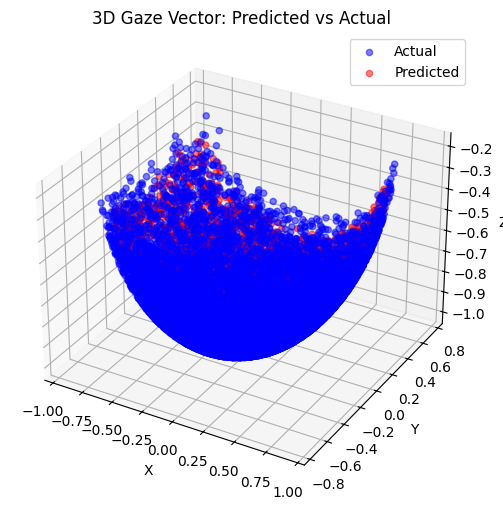

In [ ]:
y_test_pred = rf_clf.predict(X_test)


# Final evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n📊 Final Evaluation on Test Set:")
print(f"📉 MSE : {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], c='blue', alpha=0.5, label='Actual')
ax.scatter(y_test_pred[:, 0], y_test_pred[:, 1], y_test_pred[:, 2], c='red', alpha=0.5, label='Predicted')

ax.set_title("3D Gaze Vector: Predicted vs Actual")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


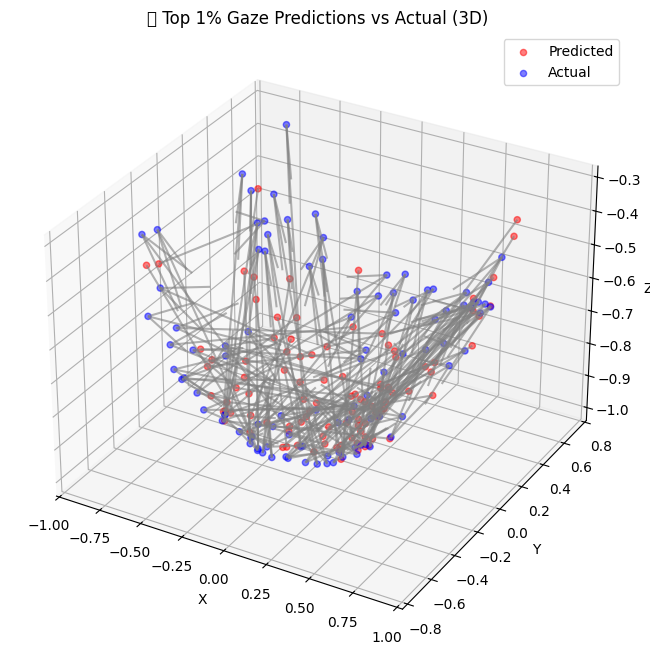

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Calculate error vectors
errors = y_test - y_test_pred
error_magnitudes = np.linalg.norm(errors, axis=1)

# Get indices of top 1% largest errors
top_k = int(len(errors) * 0.01)
top_indices = np.argsort(error_magnitudes)[-top_k:]

# Predicted gaze (start of arrow)
x_pred = y_test_pred[top_indices, 0]
y_pred = y_test_pred[top_indices, 1]
z_pred = y_test_pred[top_indices, 2]

# Actual gaze (end of arrow)
x_true = y_test[top_indices, 0]
y_true = y_test[top_indices, 1]
z_true = y_test[top_indices, 2]

# Error vector components
u = x_true - x_pred
v = y_true - y_pred
w = z_true - z_pred

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Show predicted points (red dots)
ax.scatter(x_pred, y_pred, z_pred, color='red', label='Predicted', alpha=0.5)

# Show actual points (blue dots)
ax.scatter(x_true, y_true, z_true, color='blue', label='Actual', alpha=0.5)

# Show error arrows (red lines)
ax.quiver(x_pred, y_pred, z_pred, u, v, w, color='gray', alpha=0.6)

ax.set_title("🎯 Top 1% Gaze Predictions vs Actual (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


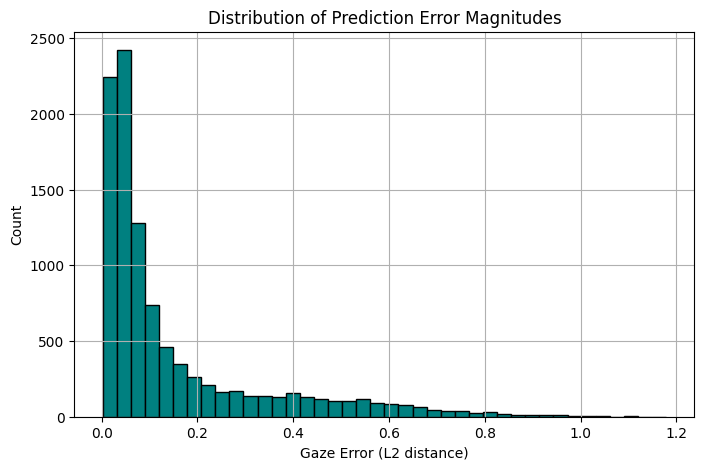

In [ ]:
#Plotting a Histogram
error_magnitudes = np.linalg.norm(y_test - y_test_pred, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(error_magnitudes, bins=40, color='teal', edgecolor='black')
plt.title("Distribution of Prediction Error Magnitudes")
plt.xlabel("Gaze Error (L2 distance)")
plt.ylabel("Count")
plt.grid(True)
plt.show()